# Importing Library

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_column',None)
from random import sample
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial import distance_matrix
from scipy.spatial import distance
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA

In [8]:
data=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\offline class\USArrests.csv")
data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


# Set Index as State

In [11]:
# Making the column 'state' as the index

data=data.set_index('State')
data.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


# Sample 10 States

In [13]:
# Creating a sample of 10 rows from the USArrests dataset

sample=data.sample(frac=0.20,replace=False,random_state=123)
print(len(sample))
print(sample)

10
              Murder  Assault  UrbanPop  Rape
State                                        
Hawaii           5.3       46        83  20.2
Indiana          7.2      113        65  21.0
New Mexico      11.4      285        70  32.1
Washington       4.0      145        73  26.2
Maine            2.1       83        51   7.8
Alabama         13.2      236        58  21.2
South Dakota     3.8       86        45  12.8
Illinois        10.4      249        83  24.0
New Jersey       7.4      159        89  18.8
Florida         15.4      335        80  31.9


# Distance Matrix to excel

In [16]:
# Computting Distance Matrix

DM=pd.DataFrame(distance_matrix(sample.values,sample.values),index=sample.index,columns=sample.index)
round(DM,2)
DM.to_csv('DM2.csv')

# Visualize the matrix

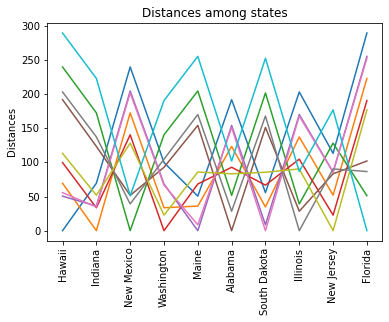

In [17]:
# Visualizing the distance using matplotlib
plt.plot(DM)
plt.ylabel('Distances')
plt.grid(False)
plt.xticks(rotation=90)
plt.title('Distances among states')
plt.show()

# Scale the Data

In [20]:
data_scaled=StandardScaler().fit_transform(data)
data_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# Find optimum nos of clusters

In [23]:
plt.figure(figsize=(10,8))

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='random',random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

wcss

[200.00000000000003,
 104.96163315756871,
 79.95548163171664,
 57.55425863091105,
 50.16335813593605,
 45.59204161261913,
 41.07688067109527,
 37.585109679913046,
 33.5776424799825,
 32.82852747693002]

<Figure size 720x576 with 0 Axes>

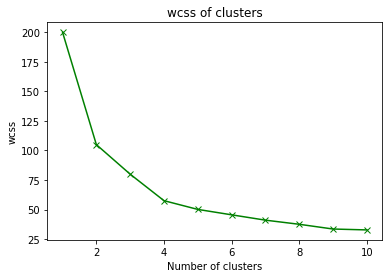

In [24]:
plt.plot(range(1,11),wcss,'gx-')
plt.title('wcss of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# Clustering happend!

In [25]:
# Running KMeans to our desired number/optimum no of clusters (k=4)
# just making the cluster in the backend (not fitted to dataset here)
kmeans=KMeans(n_clusters=4)

In [26]:
# fitting the cluster to the dataset
clusters=kmeans.fit_predict(data_scaled)

In [27]:
# cluster allocation
clusters

array([3, 1, 1, 3, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 2, 3, 2, 1, 0, 1,
       2, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0])

# Cluster Membership

In [104]:
# we are comfortable with the cluster 0, so 1 is added to the clusters to change cluster 1,1 to 2,2 to 3 and so on Therefore naming clusters 1-4 instead of 0-3 and adding to the dataframe

Final_Clusters=clusters+1
cluster=list(Final_Clusters)
data['member']=cluster          # Adding of the columns to the dataset
data.head()

,Murder,Assault,UrbanPop,Rape,member,sil_score
State,,,,,,
Alabama,13.2,236,58,21.2,2,0.485775
Alaska,10.0,263,48,44.5,3,0.058252
Arizona,8.1,294,80,31.0,3,0.415483
Arkansas,8.8,190,50,19.5,2,0.118709
California,9.0,276,91,40.6,3,0.435559


# Overall Silhouette Score

In [33]:
# silhoutte score_overall
print(f'sil score(n=4): {silhouette_score(data_scaled,cluster)}')

sil score(n=4): 0.33968891433344395


# Silhouette Score of each data point

In [34]:
# silhoutte score   ---- Each Data Poing

sample_silhouette_values=silhouette_samples(data_scaled,cluster)

In [59]:
# sample_silhouette_values is a array, convert to DF
sample_silhouette_values = pd.DataFrame(sample_silhouette_values)

In [60]:
# Export to desktop
sample_silhouette_values.to_csv('sil_values4.csv')

In [70]:
data

,Murder,Assault,UrbanPop,Rape,member,sil_score
State,,,,,,
Alabama,13.2,236,58,21.2,4,0.485775
Alaska,10.0,263,48,44.5,2,0.058252
Arizona,8.1,294,80,31.0,2,0.415483
Arkansas,8.8,190,50,19.5,4,0.118709
California,9.0,276,91,40.6,2,0.435559
Colorado,7.9,204,78,38.7,2,0.326542
Connecticut,3.3,110,77,11.1,1,0.227173
Delaware,5.9,238,72,15.8,1,0.332977
Florida,15.4,335,80,31.9,2,0.258017


# Pattern of sil_score across clusters

In [71]:
# complete data
data.info()        # cluster added already
data['sil_score']=sample_silhouette_values.values     # add silscore
data.to_csv('clstUSArrsts.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Murder     50 non-null     float64
 1   Assault    50 non-null     int64  
 2   UrbanPop   50 non-null     int64  
 3   Rape       50 non-null     float64
 4   member     50 non-null     int32  
 5   sil_score  50 non-null     float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 2.5+ KB


In [72]:
data1=pd.read_csv('clstUSArrsts.csv')

In [73]:
data1=pd.DataFrame(data1)

In [74]:
data1

,State,Murder,Assault,UrbanPop,Rape,member,sil_score
0,Alabama,13.2,236,58,21.2,4,0.485775
1,Alaska,10.0,263,48,44.5,2,0.058252
2,Arizona,8.1,294,80,31.0,2,0.415483
3,Arkansas,8.8,190,50,19.5,4,0.118709
4,California,9.0,276,91,40.6,2,0.435559
5,Colorado,7.9,204,78,38.7,2,0.326542
6,Connecticut,3.3,110,77,11.1,1,0.227173
7,Delaware,5.9,238,72,15.8,1,0.332977
8,Florida,15.4,335,80,31.9,2,0.258017
9,Georgia,17.4,211,60,25.8,4,0.371803


Text(0.5, 1.0, 'ViloinPlot of Silhouette Scores')

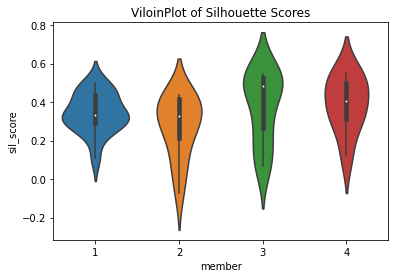

In [75]:
sns.violinplot(x='member',y='sil_score',data=data1)
plt.title('ViloinPlot of Silhouette Scores')

Text(0.5, 1.0, 'Boxplot of Silhouette Scores')

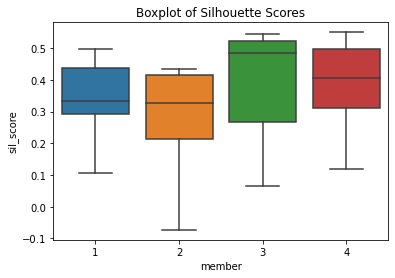

In [78]:
sns.boxplot(x='member',y='sil_score',data=data1)
plt.title('Boxplot of Silhouette Scores')

# Cluster wise sil_score

In [82]:
# silhouette score of each cluster

from sklearn.metrics import silhouette_samples

num_clusters=4

In [83]:
# sil score of each data point                               # do it again as we had made a dataframe of 'sample_slihouette_values' before
sample_silhouette_values = silhouette_samples(data_scaled,cluster)

In [92]:
means_list=[]
for i in range(num_clusters):
    means_list.append(round(sample_silhouette_values[i==clusters].mean(),2)) 
    # clusters = kmeans.fit_predict(data_scaled)
print(means_list)

[0.37, 0.39, 0.27, 0.34]


In [93]:
# plotting sil score
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

Text(0.5, 0, 'Silhouette coefficient')

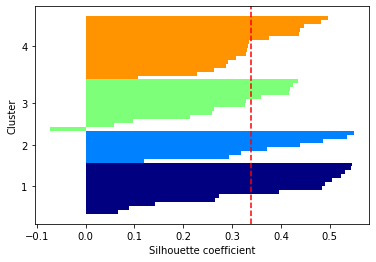

In [100]:
cluster_labels=np.unique(clusters)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(data_scaled,clusters,metric='euclidean')
y_ax_lower,y_ax_upper=0,0
yticks=[]
for i,c in enumerate(cluster_labels):
    c_silhouette_vals =silhouette_vals[clusters==c]
    c_silhouette_vals.sort()
    y_ax_upper +=len(c_silhouette_vals)
    color=cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1.0,edgecolor='none',color=color)
    yticks.append((y_ax_lower + y_ax_upper)/2.)
    y_ax_lower +=len(c_silhouette_vals)
silhouette_avg =np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')
plt.yticks(yticks,cluster_labels+1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

# Profiling of clusters

In [107]:
data

,Murder,Assault,UrbanPop,Rape,member,sil_score
State,,,,,,
Alabama,13.2,236,58,21.2,2,0.485775
Alaska,10.0,263,48,44.5,3,0.058252
Arizona,8.1,294,80,31.0,3,0.415483
Arkansas,8.8,190,50,19.5,2,0.118709
California,9.0,276,91,40.6,3,0.435559
Colorado,7.9,204,78,38.7,3,0.326542
Connecticut,3.3,110,77,11.1,4,0.227173
Delaware,5.9,238,72,15.8,4,0.332977
Florida,15.4,335,80,31.9,3,0.258017


In [110]:
data

,Murder,Assault,UrbanPop,Rape,member,sil_score
State,,,,,,
Alabama,13.2,236,58,21.2,2,0.485775
Alaska,10.0,263,48,44.5,3,0.058252
Arizona,8.1,294,80,31.0,3,0.415483
Arkansas,8.8,190,50,19.5,2,0.118709
California,9.0,276,91,40.6,3,0.435559
Colorado,7.9,204,78,38.7,3,0.326542
Connecticut,3.3,110,77,11.1,4,0.227173
Delaware,5.9,238,72,15.8,4,0.332977
Florida,15.4,335,80,31.9,3,0.258017


In [111]:
# cluster profile
data.groupby(data['member']).mean()

,Murder,Assault,UrbanPop,Rape,sil_score
member,,,,,
1,3.600000,78.538462,52.076923,12.176923,0.373407
2,13.937500,243.625000,53.750000,21.412500,0.389179
3,10.815385,257.384615,76.000000,33.192308,0.271057
4,5.656250,138.875000,73.875000,18.781250,0.343312


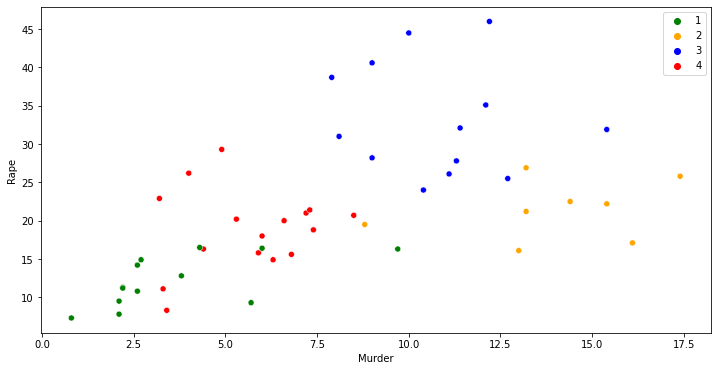

In [113]:
# cluster plot
# plotting the scatter plot

plt.figure(figsize=(12,6))

sns.scatterplot(data['Murder'],data['Rape'],hue=Final_Clusters,palette=['green','orange','blue','red'])
plt.show()

In [114]:
from yellowbrick.features import ParallelCoordinates

ModuleNotFoundError: No module named 'yellowbrick'